# Introduction
Data of 4803 movies from [The Movie Database API](https://www.themoviedb.org/) with 21 different fields.
Answer 3 questions:
<ol>
<li>What areas have the most influence on revenue?</li>
<li>How is a movie’s revenue and average score affected by its genre?</li>
<li>What influence does release date have on revenue?</li>
</ol>

# Data description

In [1]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [2]:
# read the data
tmdb_5000_movies=pd.read_csv("./input/tmdb_5000_movies.csv",index_col="id")
tmdb_5000_credits=pd.read_csv("./input/tmdb_5000_credits.csv",index_col="movie_id")
tmdb_5000=pd.merge(tmdb_5000_movies,tmdb_5000_credits)

In [3]:
tmdb_5000.shape

(4809, 21)

Total rows: 4809<br>
Total data fields: 21

Example of the first row

In [4]:
tmdb_5000.head(1)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


# Visualizations
## Top 30 movies with highest budget

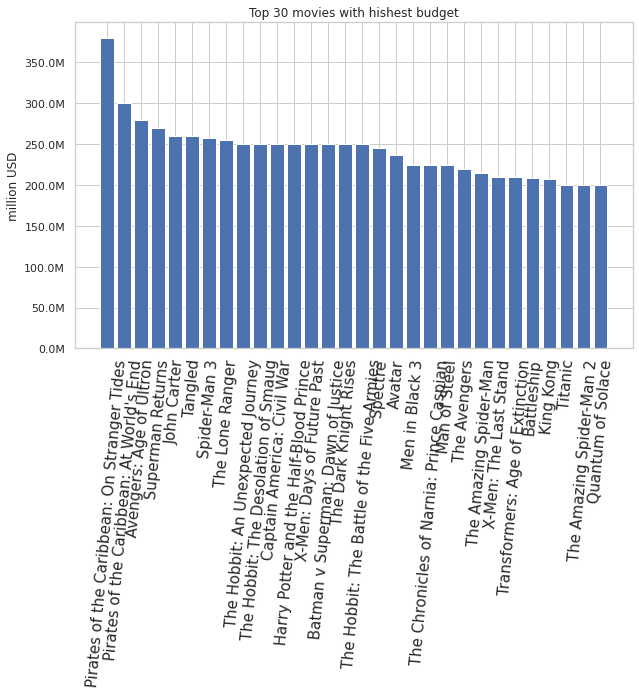

In [5]:
# print top 30 movies with highest budget
data_1 = tmdb_5000.loc[:,['budget','original_title']].sort_values(by=['budget'], ascending=False).head(30)

# format million USD for y axis
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

# draw plot
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=85, fontsize=15) # rotate the x-axis's label
plt.title('Top 30 movies with hishest budget')
ax.set_ylabel('million USD', fontsize='medium') # edit the y-axis label
ax.yaxis.set_major_formatter(formatter) # change the y-axis's label
ax.bar(data_1.loc[:, 'original_title'].values, data_1.loc[:, 'budget'].values, align="center")
plt.show()

## Number of movies by genres

In [6]:
def group_indices(series,index="id"):
    d={}
    for i in range(series.size):
        l=eval(series.iloc[i])
        for x in l:
            d.setdefault(x[index],[])
            d[x[index]].append(i)
    return d

def multi_count(series,index="id"):
    return {k:len(v) for (k,v) in group_indices(series,index).items()}

def multi_bar(series):    
    sns.set(style="whitegrid")
    count=multi_count(series,"name")
    count=sorted(count.items(),key=lambda x:x[1],reverse=True)
    count=dict(count[:30])
    f, ax = plt.subplots(figsize=(10, 6))
    plt.xticks(rotation=85, fontsize=15)
    plt.bar(count.keys(),count.values(),align="center")
    plt.show()
    
def multi_pie(series):    
    sns.set(style="whitegrid")
    count=multi_count(series,"name")
    count=sorted(count.items(),key=lambda x:x[1],reverse=True)
    count=dict(count[:30])
    f, ax = plt.subplots(figsize=(10, 6))
    plt.pie(count.values(),labels=count.keys())
    plt.show()

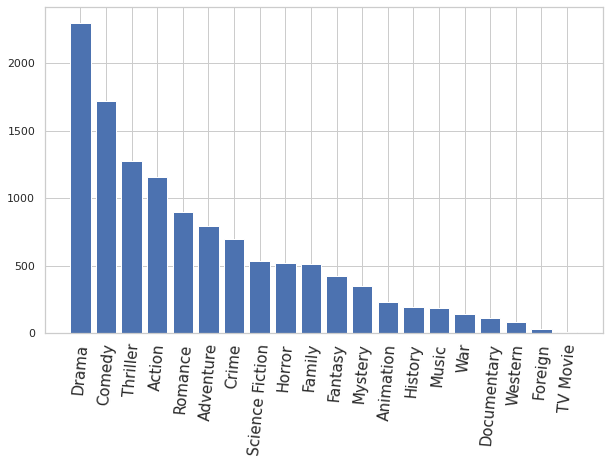

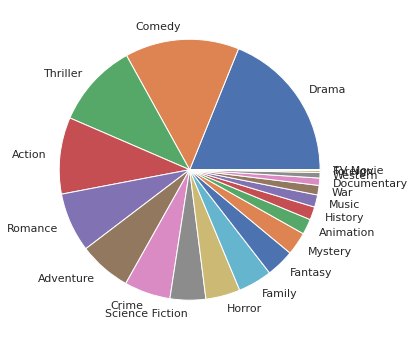

In [7]:
multi_bar(tmdb_5000.genres)
multi_pie(tmdb_5000.genres)

## Number of movies by keywords

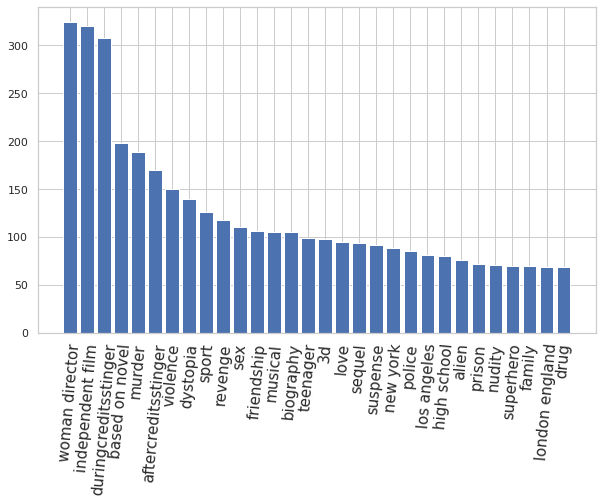

In [8]:
multi_bar(tmdb_5000.keywords)

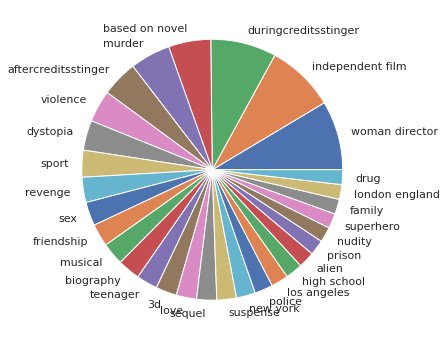

In [9]:
multi_pie(tmdb_5000.keywords)

## Movies's revenue and popularity by genres

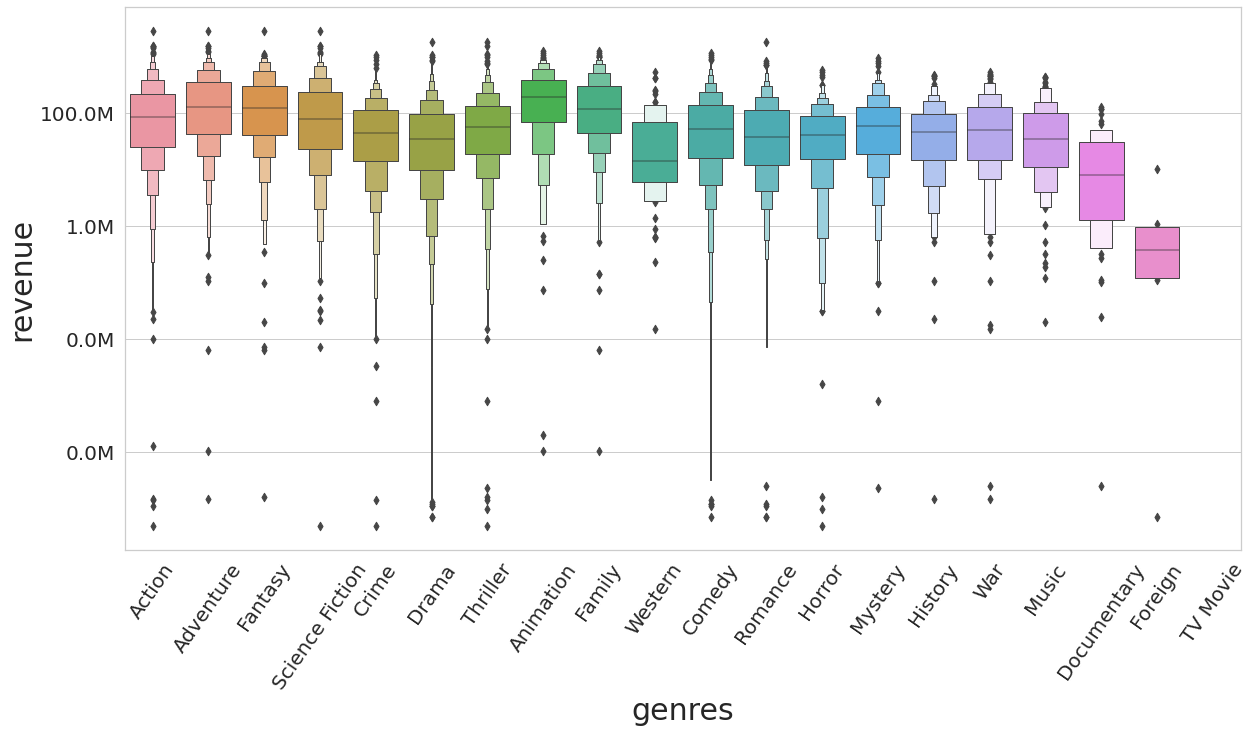

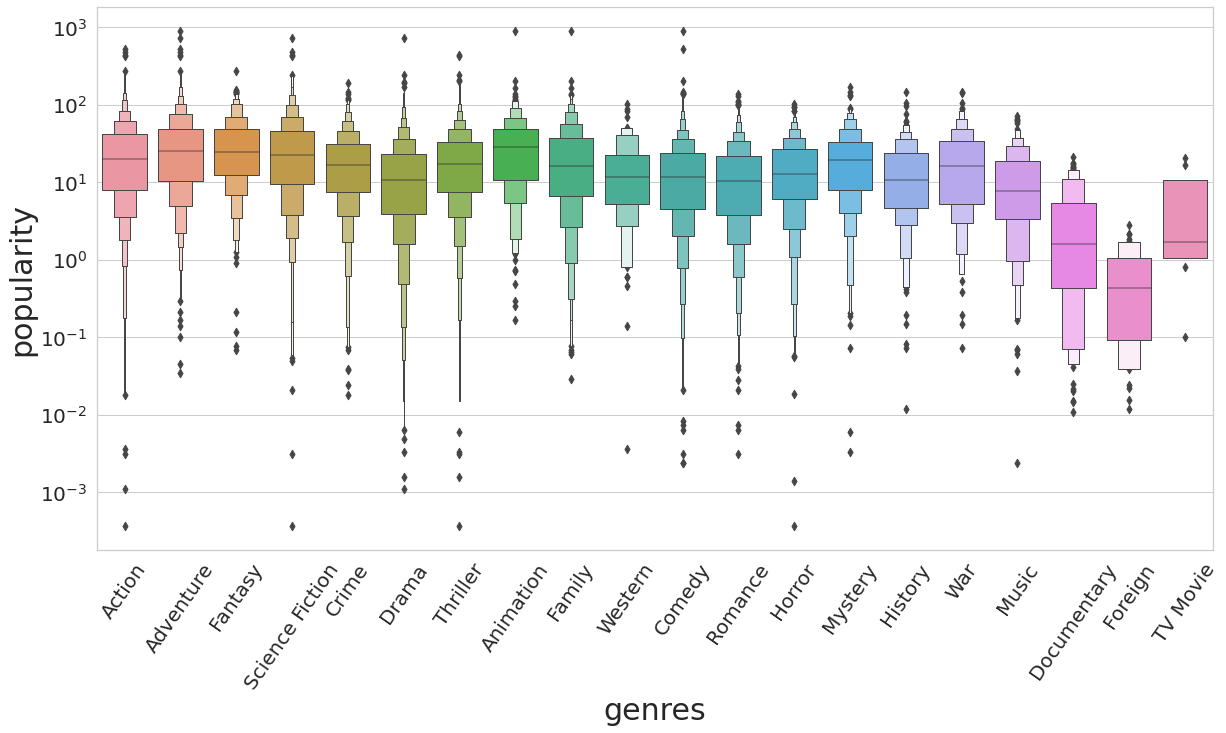

In [10]:
def group_indices(series,index='id'):
    d={}
    for i in range(series.size):
        l=eval(series.iloc[i])
        for x in l:
            d.setdefault(x[index],[])
            d[x[index]].append(i)
    return d

def expand_multi_feature(df,column,index='id'):
    groups=group_indices(df[column],index=index)
    result=pd.DataFrame()
    for name,indices in groups.items():
        rows=df.iloc[indices].copy()
        rows[column]=name
        result=result.append(rows)
    return result

def plotby_box(df,x,y,yscale="linear", yformat = False):
    sns.set(style="whitegrid")
    df=df.replace(0,np.nan).copy()
    f,ax=plt.subplots(figsize=(20, 10))
    sns.boxenplot(data=expand_multi_feature(df,x,"name"),x=x,y=y)
    plt.yscale(yscale)
    plt.yticks(fontsize=20)
    plt.xticks(rotation=55,fontsize=20)
    plt.xlabel(x,fontsize=30)
    plt.ylabel(y,fontsize=30)
    if yformat:ax.yaxis.set_major_formatter(formatter)
    plt.show()

plotby_box(tmdb_5000, 'genres', 'revenue', yscale='log', yformat = True)
plotby_box(tmdb_5000, 'genres', 'popularity', yscale='log')


## Movies' runtime by genres

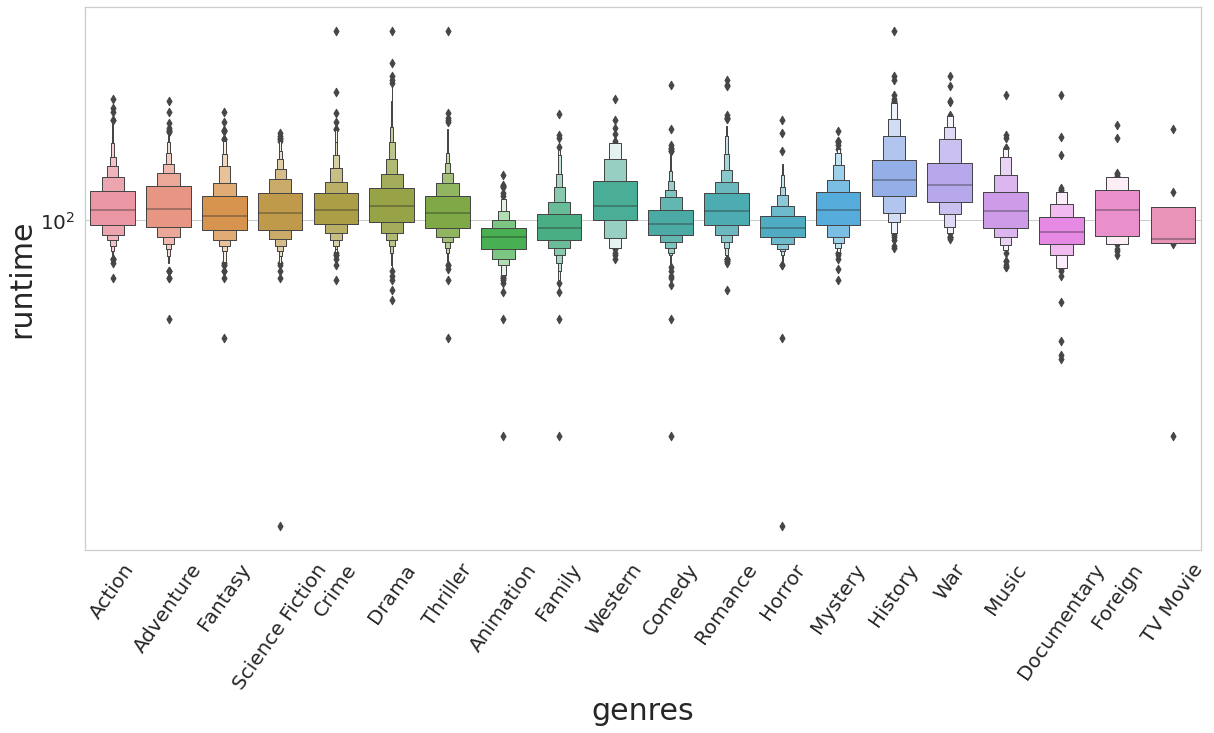

In [11]:
plotby_box(tmdb_5000, 'genres', 'runtime', yscale='log')

## Movies' average vote and vote count by genres

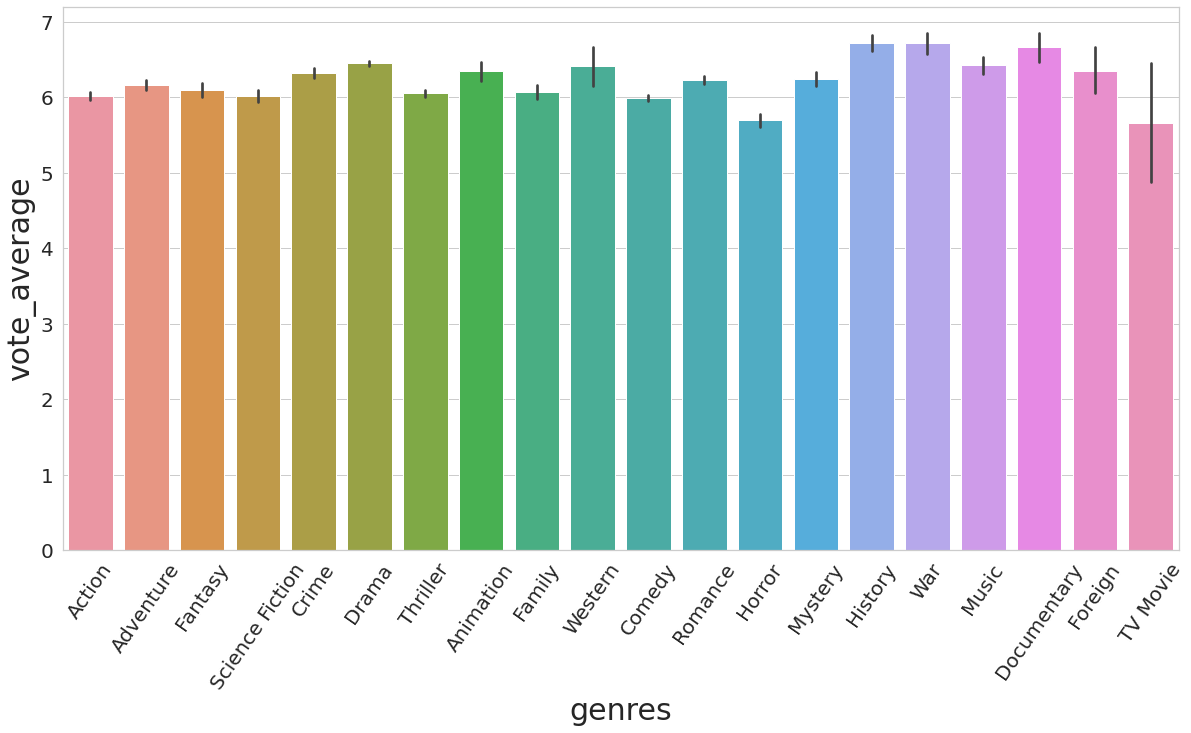

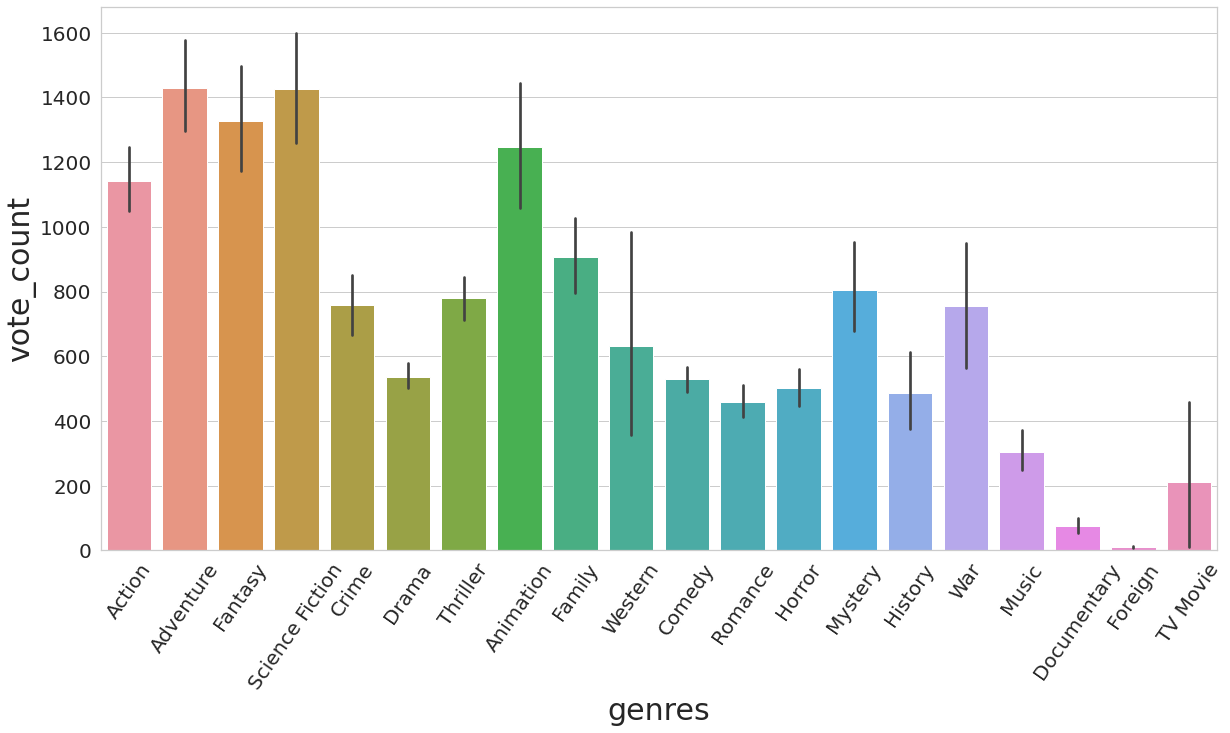

In [12]:
def plotby_bar(df,x,y):
    sns.set(style="whitegrid")
    df=df.replace(0,np.nan).copy()
    f,ax=plt.subplots(figsize=(20, 10))
    sns.barplot(data=expand_multi_feature(df,x,"name"),x=x,y=y)
    plt.yticks(fontsize=20)
    plt.xticks(rotation=55,fontsize=20)
    plt.xlabel(x,fontsize=30)
    plt.ylabel(y,fontsize=30)
    plt.show()

plotby_bar(tmdb_5000,"genres","vote_average")
plotby_bar(tmdb_5000,"genres","vote_count")
    

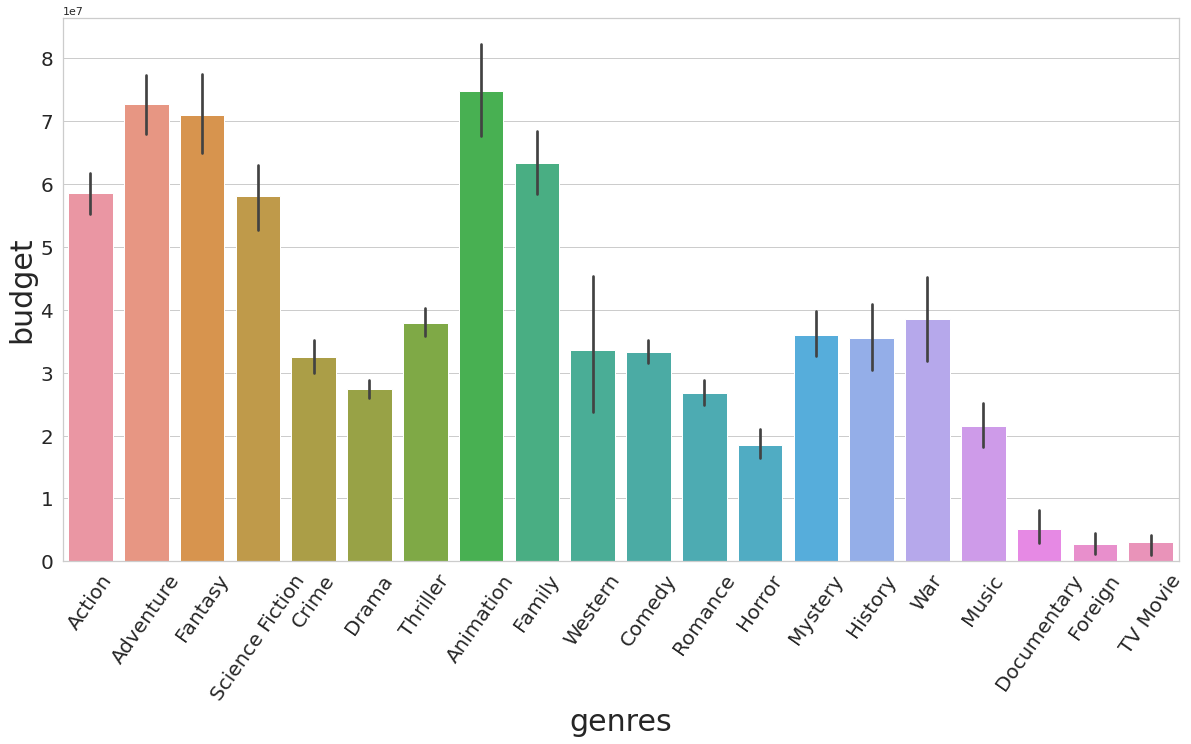

In [13]:
plotby_bar(tmdb_5000,"genres","budget")

## Relationship of revenue and budget by genres

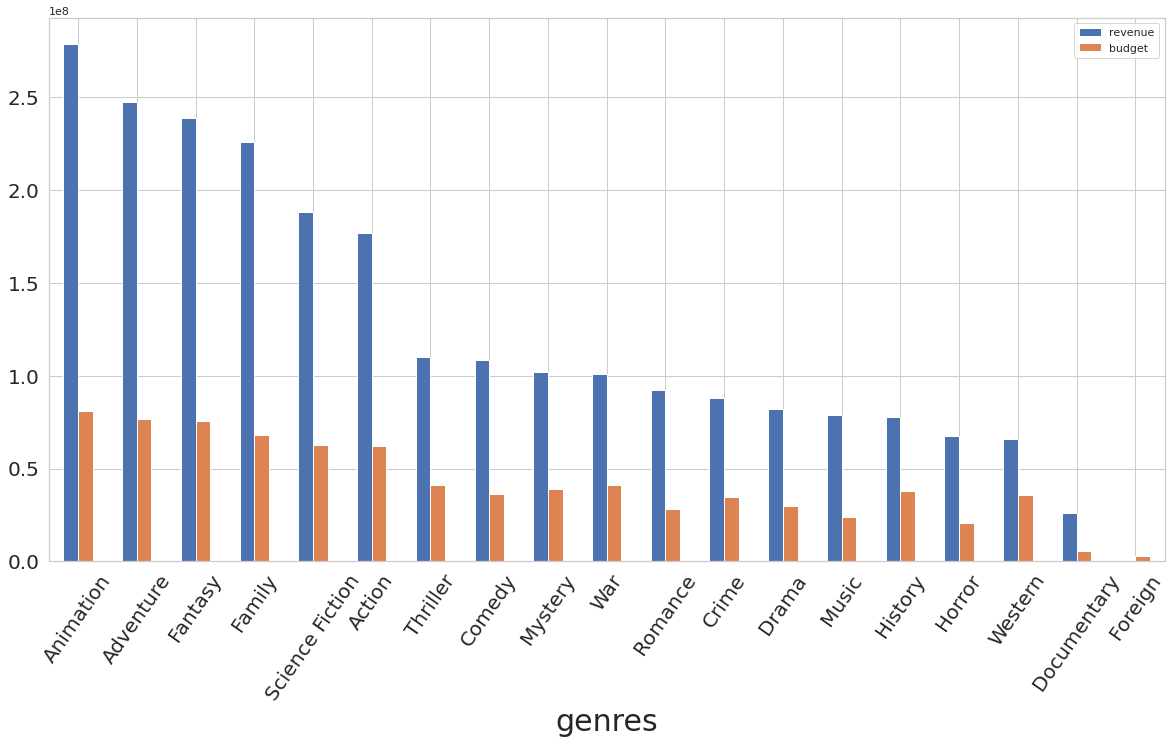

In [14]:
def multi_groupby(df,column,index="id"):
    return expand_multi_feature(df,column,index).groupby(column)

def plotby_2bar(df,x,y):
    sns.set(style="whitegrid")
    df=df.replace(0,np.nan).copy()
    f,ax=plt.subplots(figsize=(20, 10))
    multi_groupby(df.dropna(subset=y),x,"name")[y].mean().sort_values(y,ascending=False).plot(kind="bar",ax=ax)
    plt.yticks(fontsize=20)
    plt.xticks(rotation=55,fontsize=20)
    plt.xlabel(x,fontsize=30)
    plt.show()


plotby_2bar(tmdb_5000,"genres",["revenue","budget"])

## Movies' release dates throughout decades

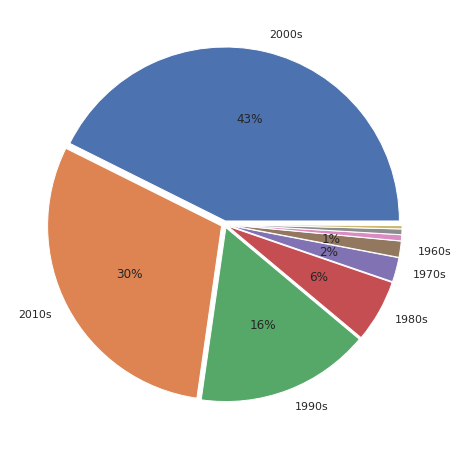

In [15]:
def count_pie(series):
    counts=series.value_counts()
    counts=counts/counts.sum()
    labels=['' if num<0.01 else str(year) for (year,num) in counts.items()]
    f, ax = plt.subplots(figsize=(8, 8))
    explode = [0.02 if counts.iloc[i] < 100 else 0.001 for i in range(counts.size)]
    plt.pie(counts,labels=labels,autopct=lambda x:'{:1.0f}%'.format(x) if x > 1 else '',explode=explode)
    plt.show()

def count_decade_pie(df):
    count_pie(df.release_date.dropna().apply(lambda x:str(int(x[:4])//10*10)+'s'))
    
count_decade_pie(tmdb_5000)

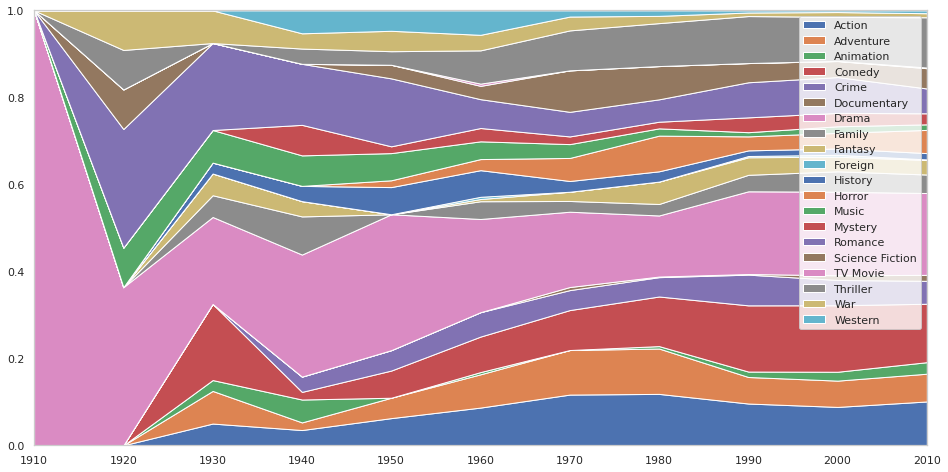

In [16]:
def multi_stackplot_10year(df,value):
    sns.set(style="whitegrid")
    df=df[["release_date",value]].dropna()
    df.release_date=df.release_date.apply(lambda x:int(x[:4])//10*10)
    df=df.sort_values("release_date")
    years=pd.Series(range(df["release_date"].min(),df["release_date"].max()+1,10),name="year")
    counts=[]
    groups=[]
    for (name,col) in multi_groupby(df,"genres","name"):
        groups.append(name)
        counts.append(pd.merge(years.to_frame(),col.groupby("release_date").size().rename("count").to_frame(),
                               how="left",left_on="year",right_on="release_date").fillna(0).astype(int)["count"])
    counts=np.array(counts)
    counts=counts.transpose(0,1)
    counts=counts/counts.sum(0)
    f, ax = plt.subplots(figsize=(16, 8))
    plt.stackplot(years,counts,labels=groups)
    plt.xticks(years)
    plt.xlim(years.iloc[0],years.iloc[-1])
    plt.ylim(0,1)
    plt.legend()
    plt.show()

multi_stackplot_10year(tmdb_5000,"genres")

## Correlation between numeric features

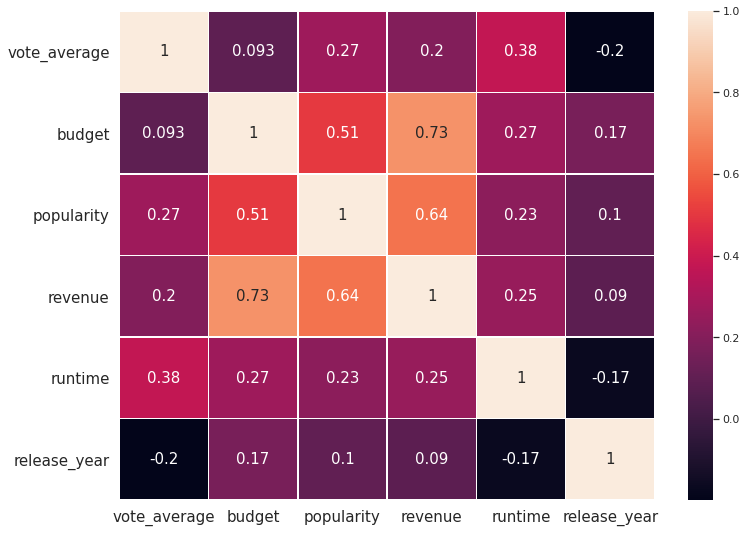

In [17]:
def plot_corr(df):
    plt.subplots(figsize=(12, 9))
    sns.heatmap(df.corr(),annot=True,linewidths=.5,annot_kws={"fontsize":15})
    plt.yticks(rotation=0,fontsize=15)
    plt.xticks(rotation=0,fontsize=15)
    plt.show()

tmdb_5000["release_year"] = tmdb_5000.release_date.apply(lambda x: float(str(x)[0:4]))
plot_corr(tmdb_5000[["vote_average","budget","popularity","revenue","runtime","release_year"]])

## Data analysis
#### Clean the data

In [18]:
tmdb_5000 = tmdb_5000.replace(0, np.nan)
tmdb_5000 = tmdb_5000.dropna()

### 1. What area have the most influence to revenue?
### For numeric fields in data frame we calculate p-value from Pearson correlation to analyze the relationship between them

In [19]:
import scipy.stats  as stats

#### Polutations: <b>vote_average</b> and <b>revenue</b>
##### Test: two-tailed correlation p-test 
##### Hypothesis:
<b>H0</b>: There is no statistically significant relationship between <b>vote_average</b> and <b>revenue</b><br>
<b>H1</b>: There is statistically significant relationship between <b>vote_average</b> and <b>revenue</b>

In [20]:
r_va_r, p_va_r = stats.pearsonr(tmdb_5000['vote_average'], tmdb_5000['revenue'])

print("p-value: " + str(p_va_r))

p-value: 5.405550003042414e-19


We have p-value << 0.025, so <b>reject the Null Hypothesis</b> => There is statistically significant relationship between <b>vote_average</b> and <b>revenue</b>

#### Polutations: <b>budget</b> and <b>revenue</b>
##### Test: two-tailed correlation p-test
##### Hypothesis:
<b>H0</b>: There is no statistically significant relationship between <b>budget</b> and <b>revenue</b><br>
<b>H1</b>: There is statistically significant relationship between <b>budget</b> and <b>revenue</b>

In [21]:
r_va_r, p_va_r = stats.pearsonr(tmdb_5000['budget'], tmdb_5000['revenue'])

print("p-value: " + str(p_va_r))

p-value: 4.484471130358519e-205


We have p-value << 0.025, so <b>reject the Null Hypothesis</b> => There is statistically significant relationship between <b>budget</b> and <b>revenue</b>

#### Polutations: <b>popularity</b> and <b>revenue</b>
##### Test: two-tailed correlation p-test 
##### Hypothesis:
<b>H0</b>: There is no statistically significant relationship between <b>popularity</b> and <b>revenue</b><br>
<b>H1</b>: There is statistically significant relationship between <b>popularity</b> and <b>revenue</b>

In [22]:
r_va_r, p_va_r = stats.pearsonr(tmdb_5000['popularity'], tmdb_5000['revenue'])

print("p-value: " + str(p_va_r))

p-value: 5.357142938838467e-106


We have p-value << 0.025, so <b>reject the Null Hypothesis</b> => There is statistically significant relationship between <b>popularity</b> and <b>revenue</b>

#### Polutations: <b>runtime</b> and <b>revenue</b>
##### Test: two-tailed correlation p-test
##### Hypothesis:
<b>H0</b>: There is no statistically significant relationship between <b>runtime</b> and <b>revenue</b><br>
<b>H1</b>: There is statistically significant relationship between <b>runtime</b> and <b>revenue</b>

In [23]:
r_va_r, p_va_r = stats.pearsonr(tmdb_5000['runtime'], tmdb_5000['revenue'])

print("p-value: " + str(p_va_r))

p-value: 2.1974682126023703e-39


We have p-value << 0.025, so <b>reject the Null Hypothesis</b> => There is statistically significant relationship between <b>runtime</b> and <b>revenue</b>

#### Polutations: <b>release_year</b> and <b>revenue</b>
##### Test: two-tailed correlation p-test 
##### Hypothesis:
<b>H0</b>: There is no statistically significant relationship between <b>release_year</b> and <b>revenue</b><br>
<b>H1</b>: There is statistically significant relationship between <b>release_year</b> and <b>revenue</b>

In [24]:
r_va_r, p_va_r = stats.pearsonr(tmdb_5000['release_year'], tmdb_5000['revenue'])

print("p-value: " + str(p_va_r))

p-value: 0.1669035233472484


We have p-value > 0.025, so <b>accept the Null Hypothesis</b> => There is <b>no</b> statistically significant relationship between <b>release_year</b> and <b>revenue</b>

<b>First conclusion</b>: because <b>p-value</b> of the correlation between <b>budget</b> and <b>revenue</b> is smallest, 4.484471130358519e-205. So for numeric fields, <b>budget</b> field has most influence on <b>revenue</b>

### For categorical fields in data frame we calculate p-value from ANOVA test to analyze the relationship between them

#### Polutations: <b>revenue</b> from different <b>genres</b>
##### Test: two-tailed ANOVA test
##### Hypothesis:
<b>H0</b>: There is no statistically significant relationship between <b>revenue</b> from different <b>genres</b><br>
<b>H1</b>: There is statistically significant relationship between <b>revenue</b> from different <b>genres</b>

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_genres = expand_multi_feature(tmdb_5000,"genres","name")

mod = ols("revenue~C(genres)", data = data_genres[["genres", "revenue"]]).fit()
anv = sm.stats.anova_lm(mod, type=2)
print(anv["PR(>F)"]["C(genres)"])

6.45330009823884e-92


We have p-value << 0.025, so <b>reject the Null Hypothesis</b> => There is statistically significant relationship between <b>revenue</b> from different <b>genres</b>

#### Polutations: <b>revenue</b> from different <b>production_countries</b>
##### Test: two-tailed ANOVA test
##### Hypothesis:
<b>H0</b>: There is no statistically significant relationship between <b>revenue</b> from different <b>production_countries</b><br>
<b>H1</b>: There is statistically significant relationship between <b>revenue</b> from different <b>production_countries</b>

In [26]:
data_production_countries = expand_multi_feature(tmdb_5000,"production_countries","name")

mod = ols("revenue ~ C(production_countries)", data = data_production_countries[["production_countries", "revenue"]]).fit()
anv = sm.stats.anova_lm(mod, type=2)
print(anv["PR(>F)"]["C(production_countries)"])

2.615904903285794e-05


We have p-value << 0.025, so <b>reject the Null Hypothesis</b> => There is statistically significant relationship between <b>revenue</b> from different <b>production_countries</b>

#### Polutations: <b>revenue</b> from different <b>original_language</b>
##### Test: two-tailed ANOVA test
##### Hypothesis:
<b>H0</b>: There is no statistically significant relationship between <b>revenue</b> from different <b>original_language</b><br>
<b>H1</b>: There is statistically significant relationship between <b>revenue</b> from different <b>original_language</b>

In [27]:
mod = ols("revenue ~ C(original_language)", data = data_genres[["original_language", "revenue"]]).fit()
anv = sm.stats.anova_lm(mod, type=2)
print(anv["PR(>F)"]["C(original_language)"])

0.0035068304391758167


We have p-value > 0.025, so <b>accept the Null Hypothesis</b> => There is <b>no</b> statistically significant relationship between <b>revenue</b> from different <b>original_language</b>

#### Polutations: <b>revenue</b> from different <b>keywords</b>
##### Test: two-tailed ANOVA test
##### Hypothesis:
<b>H0</b>: There is no statistically significant relationship between <b>revenue</b> from different <b>keywords</b><br>
<b>H1</b>: There is statistically significant relationship between <b>revenue</b> from different <b>keywords</b>

In [28]:
data_cast = expand_multi_feature(tmdb_5000,"keywords","name")

mod = ols("revenue ~ C(keywords)", data = data_cast[["keywords", "revenue"]]).fit()
anv = sm.stats.anova_lm(mod, type=2)
print(anv["PR(>F)"]["C(keywords)"])

1.3583969483867611e-34


We have p-value << 0.025, so <b>reject the Null Hypothesis</b> => There is statistically significant relationship between <b>revenue</b> from different <b>keywords</b>

<b>Second conclusion</b>: because <b>p-value</b> of <b>revenue</b> from different <b>genres</b> is smallest, 6.45330009823884e-92. So for catagorical fields, <b>genres</b> field has most influence on <b>revenue</b>

<b>Third conlusion</b>: Overall, budget has smallest p-value with revenue (4.484471130358519e-205) so budget has the largest affect on revenue 

### 2. How is a movie’s revenue and average score affected by its genre?

#### How genres affect movies' revenue

<AxesSubplot:xlabel='genres'>

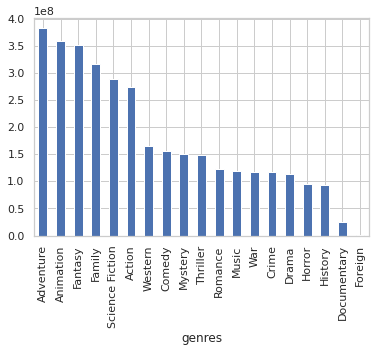

In [29]:
data_genres_grouped = data_genres.groupby('genres')['revenue'].mean()
data_genres_grouped.sort_values(ascending=False).plot(kind = 'bar')

There are high variation in revenue between different genres.

#### How genres affect movies' average score

<AxesSubplot:xlabel='genres'>

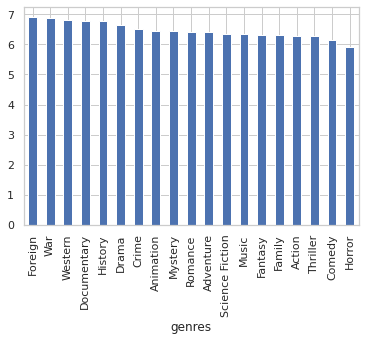

In [30]:
data_score_grouped = data_genres.groupby('genres')['vote_average'].mean()
data_score_grouped.sort_values(ascending=False).plot(kind = 'bar')

There are low variation in vote_average between differnt genres 

<b>Conclusion</b>: genres affect revenue (p-value: 6.45330009823884e-92) more than average score (p-value: 5.405550003042414e-19)

### 3. What influence does release date have on revenue?

In [31]:
data_release_date = tmdb_5000[["release_date","revenue"]].copy()

# transfrom data
data_release_date.release_date = pd.to_datetime(data_release_date.release_date)
data_release_date['day']=data_release_date.release_date.dt.day
data_release_date['month']=data_release_date.release_date.dt.month
data_release_date['year']=data_release_date.release_date.dt.year

<AxesSubplot:xlabel='day'>

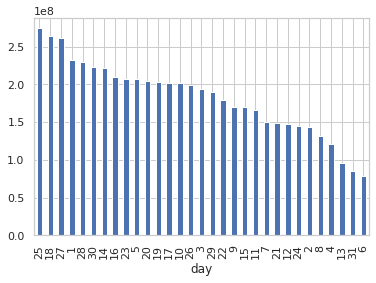

In [32]:
revenue_day_grouped = data_release_date.groupby('day')['revenue'].mean()
revenue_day_grouped.sort_values(ascending=False).plot(y = ['revenue'],kind = 'bar')

Movies release on the 25th, 18th, and 27th usually have high revenue.

<AxesSubplot:xlabel='month'>

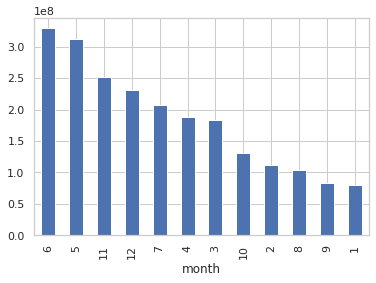

In [33]:
revenue_month_grouped = data_release_date.groupby('month')['revenue'].mean()
revenue_month_grouped.sort_values(ascending=False).plot(y = ['revenue'],kind = 'bar')

Movies released on June and May have high revenue. Could be because of summer.

<AxesSubplot:xlabel='year'>

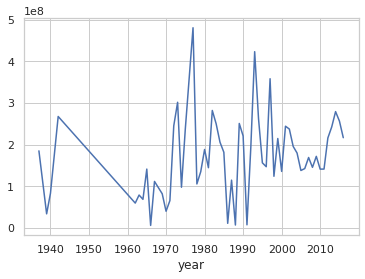

In [36]:
revenue_year_grouped = data_release_date.groupby('year')['revenue'].mean()
revenue_year_grouped.plot(y = ['revenue'],kind = 'line')

Cannot tell how the released year will affect the revenue